In [1]:
import os
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        self.classes = os.listdir(self.root_dir)
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.paths = []
        self.labels = []

        for class_name in self.classes:
            class_dir = os.path.join(self.root_dir, class_name)
            for filename in os.listdir(class_dir):
                self.paths.append(os.path.join(class_dir, filename))
                self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image_path = self.paths[idx]
        label = self.labels[idx]

        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)

        return image, label

ModuleNotFoundError: No module named 'torch'

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images and their respective class folders.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.root_dir = root_dir
        self.transform = transform
        
        # Create a list of file paths and their corresponding labels
        self.image_paths = []
        self.labels = []
        
        class_folders = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
        
        # Assign an integer label to each class/folder
        self.class_to_int = {c: idx for idx, c in enumerate(class_folders)}
        
        for class_folder in class_folders:
            folder_path = os.path.join(root_dir, class_folder)
            for file in os.listdir(folder_path):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    self.image_paths.append(os.path.join(folder_path, file))
                    self.labels.append(self.class_to_int[class_folder])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")  # Convert grayscale images to RGB
        
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[idx]
        return image, label

# Example usage:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

dataset = CustomImageDataset(root_dir='C:/Users/denis/Desktop/HNS/projekt1/Dataset_Znacky/Train-adj-train-test/train', transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

test_dataset = CustomImageDataset(root_dir='C:/Users/denis/Desktop/HNS/projekt1/Dataset_Znacky/Train-adj-train-test/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Get a sample from the dataset
image, label = dataset[0]
print(image.shape, label)

torch.Size([3, 64, 64]) 0


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import torch.nn.functional as F

In [ ]:
# from torch.utils.data import DataLoader
# train_transforms = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.ToTensor()  
# ])

# dataset = CustomDataset(root_dir='C:/Users/denis/Desktop/HNS/projekt1/Dataset_Znacky/Train-adj/', transform = train_transforms)
# train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
# test_dataset = datasets.ImageFolder(os.path.dirname('C:/Users/denis/Desktop/HNS/projekt1/Dataset_Znacky/test-no-labels/'), transform = train_transforms)


# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
class SimpleCNN_x(nn.Module):
    def __init__(self, num_classes=12):  
        super(SimpleCNN_x, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        # self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        # self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        #self.conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(163840, 524)  
        self.fc2 = nn.Linear(524, num_classes)

    def forward(self, x):
        x1 = F.leaky_relu(self.conv1(x))
        x1 = self.pool(x1)
        x2 = F.leaky_relu(self.conv2(x1))
        x3 = self.pool(x2)
        # x4 = self.pool(F.relu(self.conv3(x3)))
        # x4 = self.dropout(x4)
        x5 = x3.view(x3.size(0), -1) 
        xx = torch.cat([x5, torch.sin(x5)
        , torch.cos(x5), torch.sin(2 * x5), torch.cos(2 * x5)], dim=1) 
        x5 = self.dropout(xx)
        x6 = F.leaky_relu(self.fc1(x5))
        x6 = self.dropout(x6)
        out = self.fc2(x6)
        return x1, x2, out

Epoch [1/45], Step [0/378], Loss: 2.4935
Epoch [1/45], Step [100/378], Loss: 2.4749
Epoch [1/45], Step [200/378], Loss: 2.3563
Epoch [1/45], Step [300/378], Loss: 2.3054
Epoch [1/45], Average Training Loss: 2.3507
Epoch [1/45], Average Validation Loss: 2.3365
Epoch [2/45], Step [0/378], Loss: 2.7907
Epoch [2/45], Step [100/378], Loss: 2.3231
Epoch [2/45], Step [200/378], Loss: 2.6088
Epoch [2/45], Step [300/378], Loss: 2.3087
Epoch [2/45], Average Training Loss: 2.2928
Epoch [2/45], Average Validation Loss: 2.2118
Epoch [3/45], Step [0/378], Loss: 2.2154
Epoch [3/45], Step [100/378], Loss: 2.1823
Epoch [3/45], Step [200/378], Loss: 2.1973
Epoch [3/45], Step [300/378], Loss: 2.0438
Epoch [3/45], Average Training Loss: 2.1128
Epoch [3/45], Average Validation Loss: 1.7586
Epoch [4/45], Step [0/378], Loss: 1.8501
Epoch [4/45], Step [100/378], Loss: 1.6249
Epoch [4/45], Step [200/378], Loss: 1.3039
Epoch [4/45], Step [300/378], Loss: 1.1799
Epoch [4/45], Average Training Loss: 1.4648
Epoch 

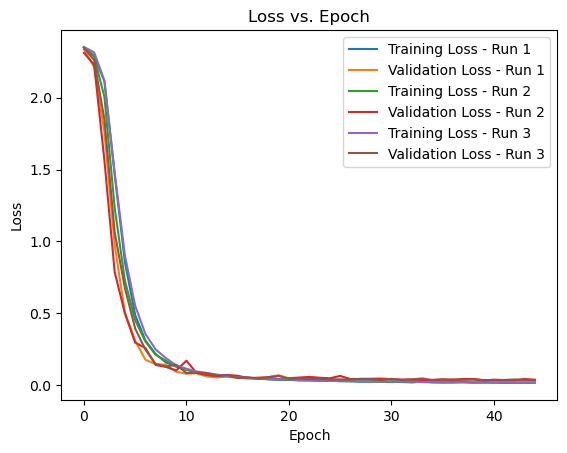

Average Test Accuracy over 3 runs: 99.07%


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()  
num_epochs = 45
accumulated_test_accuracies = []
num_classes = 12  

for run in range(3):  
    model = SimpleCNN_x().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.8)
    
    train_loss_values = []
    val_loss_values = []

    for epoch in range(num_epochs):
        
        model.train()
        epoch_train_loss = 0.0
        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)

            _, _, outputs = model(data)
            loss = criterion(outputs, targets)
            epoch_train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:  
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')

            torch.cuda.empty_cache()
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_loss_values.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {avg_train_loss:.4f}')

      
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (data, targets) in enumerate(test_loader): 
                data, targets = data.to(device), targets.to(device)

                _, _, outputs = model(data)
                loss = criterion(outputs, targets)
                epoch_val_loss += loss.item()
        avg_val_loss = epoch_val_loss / len(test_loader)
        val_loss_values.append(avg_val_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Validation Loss: {avg_val_loss:.4f}')

    plt.plot(train_loss_values, label=f"Training Loss - Run {run+1}")
    plt.plot(val_loss_values, label=f"Validation Loss - Run {run+1}")

    print("Training complete.")
    model.eval()

    test_loss = 0.0
    correct = 0
    total = 0

  
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)

          
            _, _, outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

       
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    accumulated_test_accuracies.append(test_accuracy)

    print(f"Run {run+1} Test Accuracy: {test_accuracy:.2f}%")


average_accuracy = sum(accumulated_test_accuracies) / 3

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()
print(f"Average Test Accuracy over 3 runs: {average_accuracy:.2f}%")


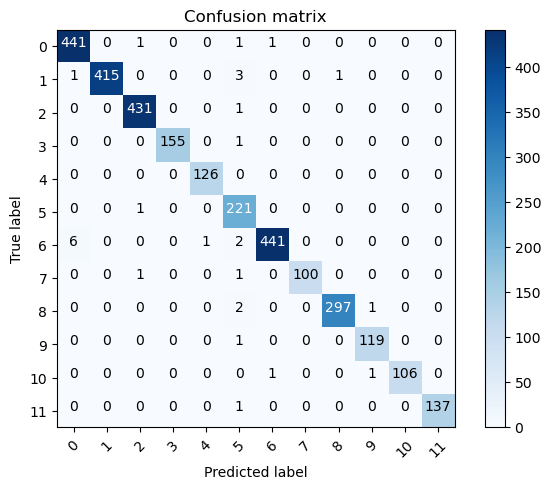

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(int(cm[i, j]), 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
confusion_matrix = np.zeros((num_classes, num_classes))
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        _, _, outputs = model(data)
        _, predicted = outputs.max(1)
        for t, p in zip(targets.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plot_confusion_matrix(confusion_matrix, list(range(num_classes)))

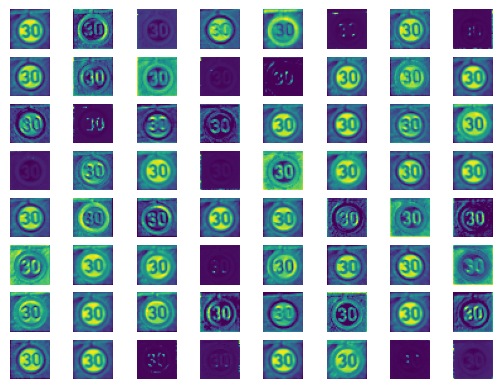

In [ ]:
for batch_idx, (data, targets) in enumerate(train_loader):
    data, targets = data.to(device), targets.to(device)

x1, x2, outputs = model(data)


feature_maps = x1[1].detach().cpu().numpy()  


for i, feature_map in enumerate(feature_maps):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature_map, cmap='viridis')
    plt.axis('off')

plt.show()

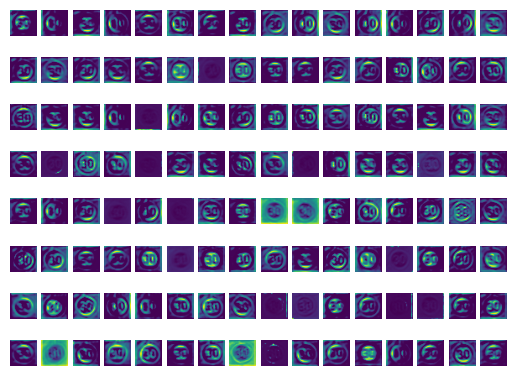

In [ ]:
feature_maps = x2[1].detach().cpu().numpy()  


for i, feature_map in enumerate(feature_maps):
    plt.subplot(8, 16, i+1)
    plt.imshow(feature_map, cmap='viridis')
    plt.axis('off')

plt.show()

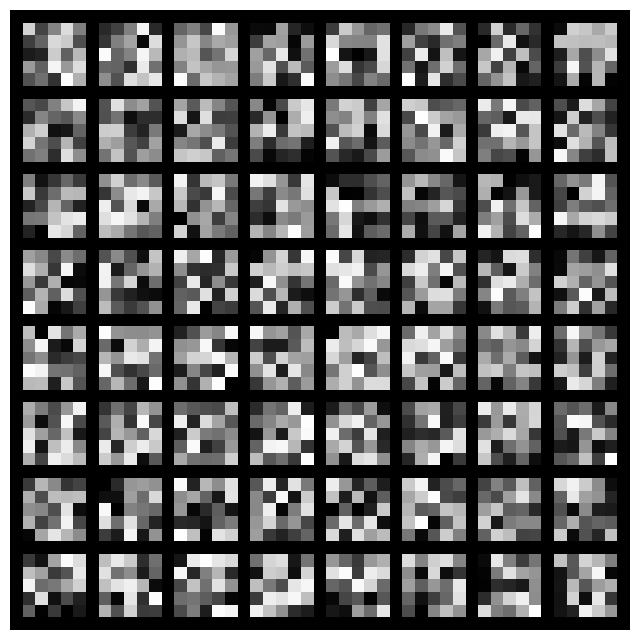

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

model = SimpleCNN_x()

def visTensor(tensor, ch=0, nrow=8, padding=1): 
 
        tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

filter = model.conv1.weight.data.clone()
visTensor(filter, ch=0)

plt.axis('off')
plt.ioff()
plt.show()     

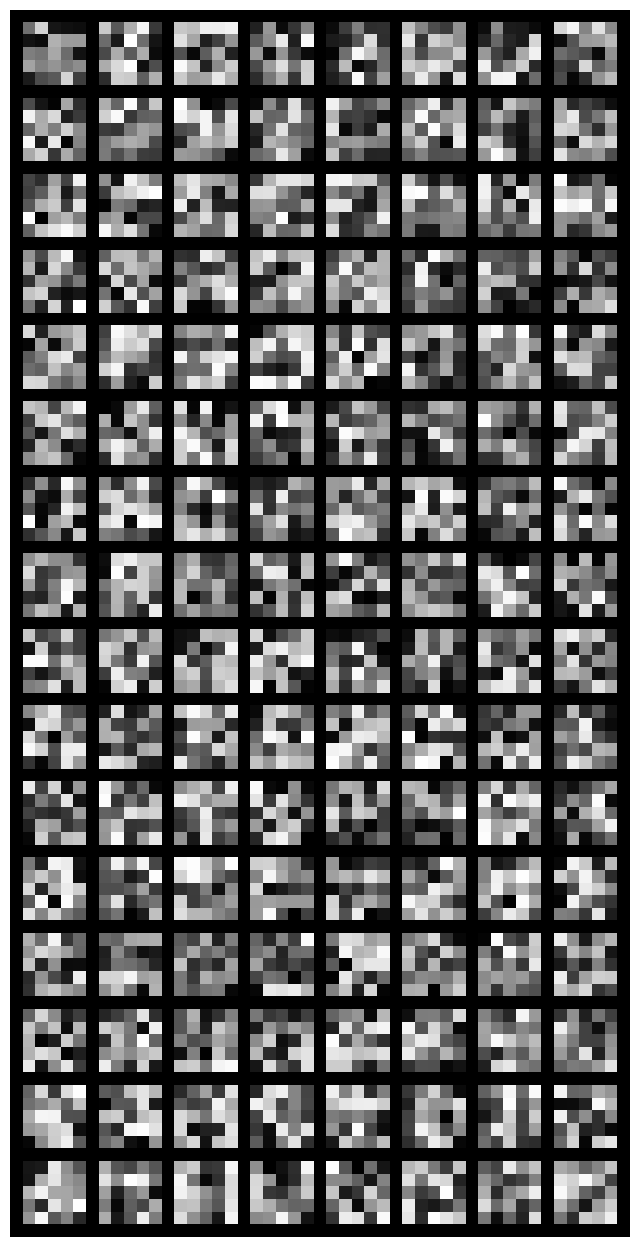

In [ ]:
filter = model.conv2.weight.data.clone()
visTensor(filter, ch=0)

plt.axis('off')
plt.ioff()
plt.show() 

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = SimpleCNN_x().to(device)
# criterion = nn.CrossEntropyLoss()  
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.8)

# num_epochs = 30

# loss_values = []


# for epoch in range(num_epochs):
#     model.train()
#     epoch_loss = 0.0
#     for batch_idx, (data, targets) in enumerate(train_loader):
#         data, targets = data.to(device), targets.to(device)

       
#         _, _, outputs = model(data)
#         loss = criterion(outputs, targets)
#         epoch_loss += loss.item()

     
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch_idx % 100 == 0:  
#             print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')

#         torch.cuda.empty_cache()
#     avg_epoch_loss = epoch_loss / len(train_loader)
#     loss_values.append(avg_epoch_loss)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_epoch_loss:.4f}')

# # Plot the loss values
# plt.plot(loss_values)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss vs. Epoch')
# plt.show()

# print("Training complete.")

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()  
])
test_dataset = datasets.ImageFolder(os.path.dirname('C:/Users/denis/Desktop/HNS/projekt1/Dataset_Znacky/test-no-labels/'), transform = train_transforms)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import matplotlib.pyplot as plt

c_names = ['1','2','12','13','14','15','17','23','25','26','28','33']

def test_images(model, device, image_tensors, class_names):

    assert image_tensors.size(0) == 10
    
    
    model.eval()
    image_tensors = image_tensors.to(device)
    
    with torch.no_grad():
        _, _, outputs = model(image_tensors)
        _, predicted_indices = outputs.max(1)  

    plt.figure(figsize=(20, 10))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        predicted_class = class_names[predicted_indices[i].item()]
        
    
        np_image = image_tensors[i].cpu().numpy().transpose((1, 2, 0))
        plt.imshow(np_image)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')  

    plt.tight_layout()
    plt.show()


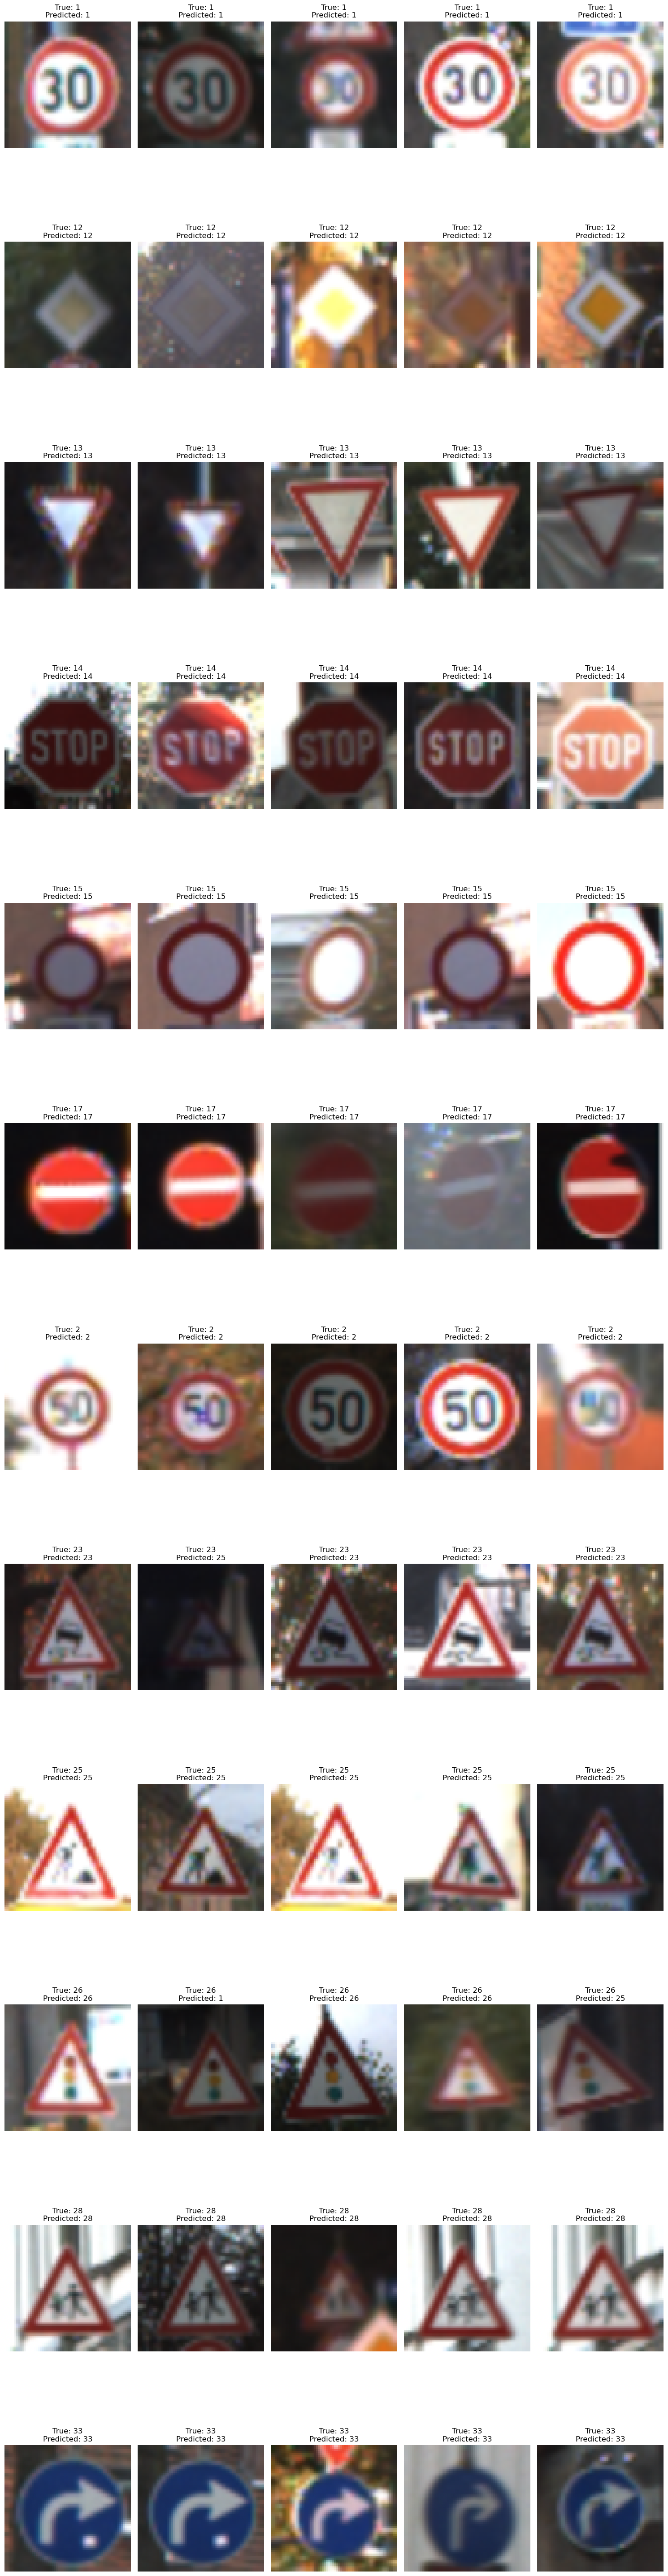

In [ ]:
import matplotlib.pyplot as plt
def display_predictions(dataset, model, num_images=25, num_columns=5):
   
    num_rows = int(num_images / num_columns) + (num_images % num_columns > 0)
    
    plt.figure(figsize=(15, 5*num_rows))
    for i in range(num_images):
        image, true_label = dataset[i]
        
    
        input_tensor = image.unsqueeze(0).to(device)
       
    
        with torch.no_grad():
            outputs = model(input_tensor)
            _, predicted_label = torch.max(outputs[2], 1)
        
        if isinstance(image, torch.Tensor):
            image = transforms.ToPILImage()(image)
        
        plt.subplot(num_rows, num_columns, i+1)
        plt.imshow(image)
        plt.title(f"True: {dataset.classes[true_label]}\nPredicted: {dataset.classes[predicted_label.item()]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_predictions(test_dataset, model, num_images=12*5)